This notebook is a tutorial for training and prediction in data2.

# Load Dependencies

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from rdkit import Chem
from script.MIGNN_model import Graph_DataLoader,MIGNN_model2
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Load Steric and Electronic Information

In [3]:
react_spms = np.load('./data2/run_data/data2_SEMG_MIGNN_react_spms.npy')
react_elec = np.load('./data2/run_data/data2_SEMG_MIGNN_react_elec.npy')
labels = np.load('./data2/run_data/data2_SEMG_MIGNN_labels.npy')
label_std = np.load('./data2/run_data/data2_SEMG_MIGNN_label_std.npy')

# Train Model

## Interpolative Task

In [4]:
loss = 'mse'
batch_size = 32
shuffle = np.array(list(range(len(react_spms))))
np.random.seed(2021)
np.random.shuffle(shuffle)
train_index = shuffle[:600]
val_index = shuffle[600:]
spms_train,elec_train,y_train = react_spms[train_index],react_elec[train_index],labels[train_index]
spms_val,elec_val,y_val = react_spms[val_index],react_elec[val_index],labels[val_index]
y_train_std=(y_train-y_train.min())/(y_train.max()-y_train.min())
y_val_std=(y_val-y_train.min())/(y_train.max()-y_train.min())
train_gen = Graph_DataLoader(spms_train,elec_train,y_train_std,batch_size=batch_size)
valid_gen = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size)
valid_gen_predict = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size,predict=True)

In [5]:
model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='dense')
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt,loss=loss)
checkpoint = tf.train.Checkpoint(myAwesomeModel=model)
EPOCHS = 50
for epoch in range(EPOCHS):
    hist = model.fit(train_gen,validation_data=valid_gen)
    path = checkpoint.save('./data2/run_data/data2_random.ckpt')
    print("model saved to %s" % path)
opt = tf.keras.optimizers.Adam()
new_model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='dense')
new_model.compile(optimizer=opt,loss='mse')
_ = new_model.fit(valid_gen,epochs=1)
checkpoint = tf.train.Checkpoint(myAwesomeModel=new_model) 
checkpoint.restore('./data2/run_data/data2_random.ckpt-50') 

y_pred = new_model.predict(valid_gen_predict)
y_pred=y_pred*(y_train.max()-y_train.min())+y_train.min()

2023-02-20 18:59:30.171333: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2023-02-20 18:59:30.171417: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: c0ee79c535f7
2023-02-20 18:59:30.171439: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: c0ee79c535f7
2023-02-20 18:59:30.171658: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 495.29.5
2023-02-20 18:59:30.178240: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 495.29.5
2023-02-20 18:59:30.178287: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 495.29.5
2023-02-20 18:59:30.179140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in

19/19 [==============================] - 9s 356ms/step - loss: 0.0722 - val_loss: 0.0459
model saved to ./data2/run_data/data2_random.ckpt-1
19/19 [==============================] - 7s 361ms/step - loss: 0.0414 - val_loss: 0.0369
model saved to ./data2/run_data/data2_random.ckpt-2
19/19 [==============================] - 7s 360ms/step - loss: 0.0304 - val_loss: 0.0443
model saved to ./data2/run_data/data2_random.ckpt-3
19/19 [==============================] - 7s 363ms/step - loss: 0.0218 - val_loss: 0.0266
model saved to ./data2/run_data/data2_random.ckpt-4
19/19 [==============================] - 7s 361ms/step - loss: 0.0168 - val_loss: 0.0249
model saved to ./data2/run_data/data2_random.ckpt-5
19/19 [==============================] - 7s 361ms/step - loss: 0.0101 - val_loss: 0.0131
model saved to ./data2/run_data/data2_random.ckpt-6
19/19 [==============================] - 7s 363ms/step - loss: 0.0067 - val_loss: 0.0148
model saved to ./data2/run_data/data2_random.ckpt-7
19/19 [======

In [6]:
loss = 'mse'
batch_size = 32
shuffle = np.array(list(range(len(react_spms))))
np.random.seed(2021)
np.random.shuffle(shuffle)
train_index = shuffle[:600]
val_index = shuffle[600:]
spms_train,elec_train,y_train = react_spms[train_index],react_elec[train_index],labels[train_index]
spms_val,elec_val,y_val = react_spms[val_index],react_elec[val_index],labels[val_index]
y_train_std=(y_train-y_train.min())/(y_train.max()-y_train.min())
y_val_std=(y_val-y_train.min())/(y_train.max()-y_train.min())

train_gen = Graph_DataLoader(spms_train,elec_train,y_train_std,batch_size=batch_size)
valid_gen = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size)
valid_gen_predict = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size,predict=True)

opt = tf.keras.optimizers.Adam()
new_model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='dense')
new_model.compile(optimizer=opt,loss='mse')
checkpoint = tf.train.Checkpoint(myAwesomeModel=new_model) 
checkpoint.restore('./data2/run_data/data2_random.ckpt-50')
_ = new_model.fit(valid_gen,epochs=1)
 

y_pred = new_model.predict(valid_gen_predict)
y_pred=y_pred*(y_train.max()-y_train.min())+y_train.min()

15/15 [==============================] - 2s 78ms/step


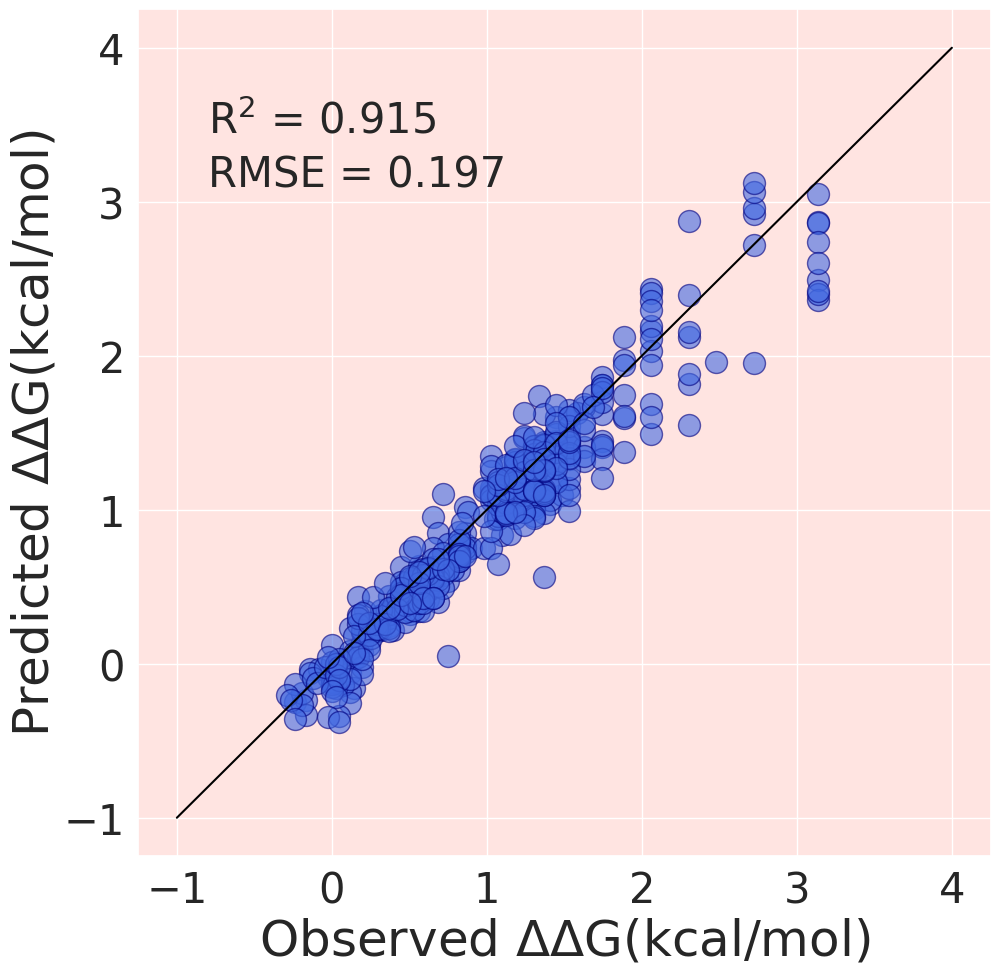

In [8]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

In [9]:
np.save('./result/data2_SEMG_MIGNN_y_val.npy',y_val)
np.save('./result/data2_SEMG_MIGNN_y_pred.npy',y_pred)

## Extrapolative Tasks

In [5]:
data_file = './Data/data2/data2.csv'
mol_dir = './Data/data2/xtb_sdf/'

tmp_df = pd.read_csv(data_file)
cat_smiles = np.array(tmp_df['Catalyst'].to_list())
imine_smiles = np.array(tmp_df['Imine'].to_list())
thiol_smiles = np.array(tmp_df['Thiol'].to_list())
labels = np.array(tmp_df['Output'].to_list())
label_std = (np.array(labels)-np.min(labels))/(np.max(labels)-np.min(labels))
cat_smi_set = list(set(cat_smiles))
imine_smi_set = list(set(imine_smiles))
thiol_smi_set = list(set(thiol_smiles))

### Thiol Splitting

0 SC1=CC=CC=C1C
1 SC1=CC=C(OC)C=C1
2 SC1=CC=CC=C1
3 SC1CCCCC1
4 CCS


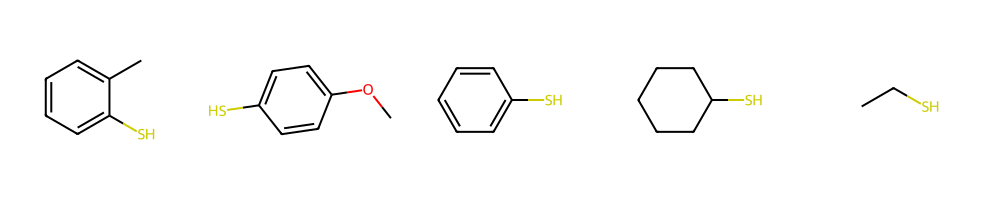

In [5]:
mols=[Chem.MolFromSmiles(smi) for smi in thiol_smi_set]
for index,i in enumerate(thiol_smi_set):
    print(index,i)
Chem.Draw.MolsToGridImage(mols,molsPerRow=5,subImgSize=(200,200))

In [ ]:
train_thiol = [ 'SC1=CC=CC=C1C', 'SC1=CC=C(OC)C=C1','SC1=CC=CC=C1']
test_thiol = ['SC1CCCCC1','CCS']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(thiol_smiles):
    if tmp_smi in train_thiol:
        train_index.append(tmp_idx)
    elif tmp_smi in test_thiol:
        val_index.append(tmp_idx)
        
loss = 'mse'
batch_size = 32
spms_train,elec_train,y_train = react_spms[train_index],react_elec[train_index],labels[train_index]
spms_val,elec_val,y_val = react_spms[val_index],react_elec[val_index],labels[val_index]

y_train_std=(y_train-y_train.min())/(y_train.max()-y_train.min())
y_val_std=(y_val-y_train.min())/(y_train.max()-y_train.min())
                                                   
train_gen = Graph_DataLoader(spms_train,elec_train,y_train_std,batch_size=batch_size)
valid_gen = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size)
valid_gen_predict = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size,predict=True)
opt = tf.keras.optimizers.Adam()


model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='dense')
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt,loss=loss)
checkpoint = tf.train.Checkpoint(myAwesomeModel=model)
EPOCHS = 50
for epoch in range(EPOCHS):
    hist = model.fit(train_gen,validation_data=valid_gen)
    path = checkpoint.save('./data2/run_data/data2_sca_thiol.ckpt')
    print("model saved to %s" % path)#6 1 128

14/14 [==============================] - 2s 88ms/step


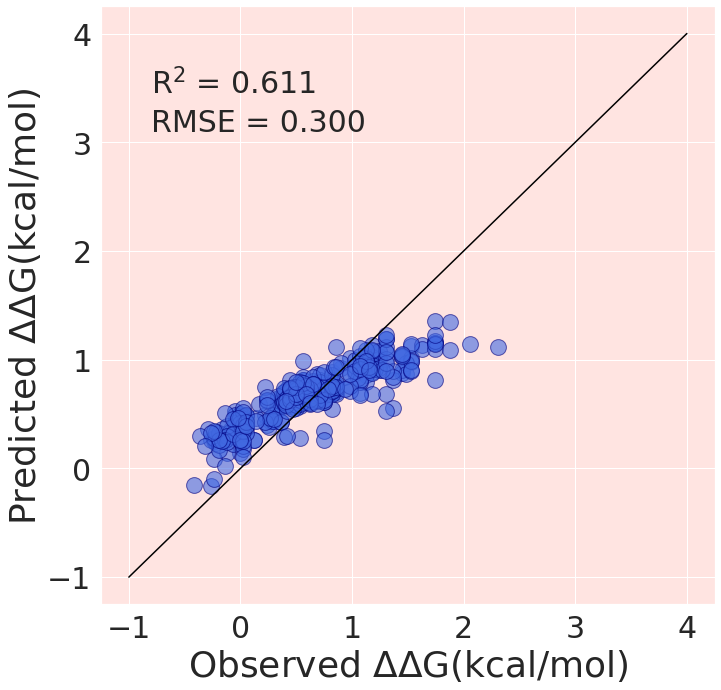

In [13]:
opt = tf.keras.optimizers.Adam()
new_model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='none')
new_model.compile(optimizer=opt,loss='mse')

checkpoint = tf.train.Checkpoint(myAwesomeModel=new_model) 
checkpoint.restore('./data2/run_data/data2_sca_thiol.ckpt-50') 
_ = new_model.fit(valid_gen,epochs=1)
y_pred = new_model.predict(valid_gen_predict)
y_pred=y_pred*(y_train.max()-y_train.min())+y_train.min()

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

In [12]:
np.save('./result/data1_SEMG_MIGNN_y_val_sca_thiol.npy',y_val)
np.save('./result/data1_SEMG_MIGNN_y_pred_sca_thiol.npy',y_pred)

### Imine Splitting

0 O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2
1 O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl
2 O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3
3 O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2
4 O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2


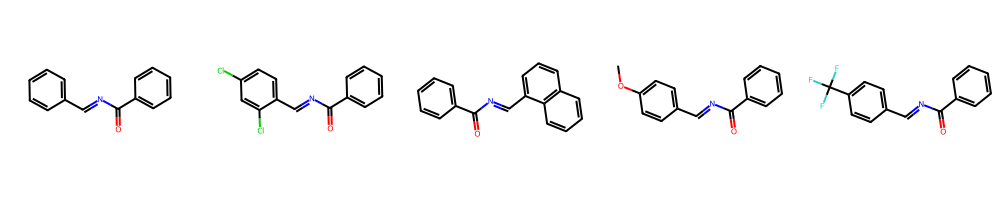

In [10]:
mols=[Chem.MolFromSmiles(smi) for smi in imine_smi_set]
for index,i in enumerate(imine_smi_set):
    print(index,i)
Chem.Draw.MolsToGridImage(mols,molsPerRow=5,subImgSize=(200,200))

In [ ]:
train_imine = [ 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2', 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl',
               'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2', 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2']
test_imine = [ 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(imine_smiles):
    if tmp_smi in train_imine:
        train_index.append(tmp_idx)
    elif tmp_smi in test_imine:
        val_index.append(tmp_idx)
        
loss = 'mse'
batch_size = 32
spms_train,elec_train,y_train = react_spms[train_index],react_elec[train_index],labels[train_index]
spms_val,elec_val,y_val = react_spms[val_index],react_elec[val_index],labels[val_index]

y_train_std=(y_train-y_train.min())/(y_train.max()-y_train.min())
y_val_std=(y_val-y_train.min())/(y_train.max()-y_train.min())
                                                   
train_gen = Graph_DataLoader(spms_train,elec_train,y_train_std,batch_size=batch_size)
valid_gen = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size)
valid_gen_predict = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size,predict=True)
opt = tf.keras.optimizers.Adam()


model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='dense')
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt,loss=loss)
checkpoint = tf.train.Checkpoint(myAwesomeModel=model)
EPOCHS = 50
for epoch in range(EPOCHS):
    hist = model.fit(train_gen,validation_data=valid_gen)
    path = checkpoint.save('./data2/run_data/data2_sca_imine.ckpt')
    print("model saved to %s" % path)


7/7 [==============================] - 1s 86ms/step


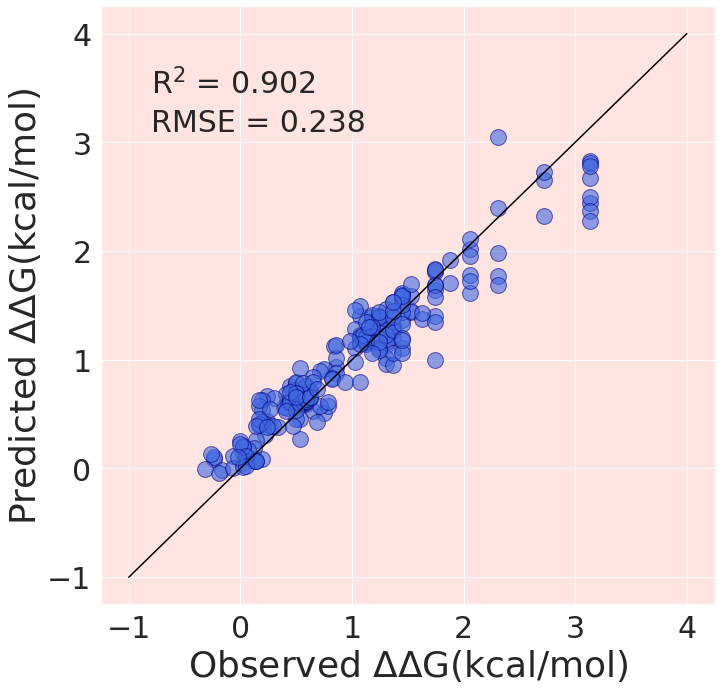

In [47]:
opt = tf.keras.optimizers.Adam()
new_model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='none')
new_model.compile(optimizer=opt,loss='mse')
_ = new_model.fit(valid_gen,epochs=1)
checkpoint = tf.train.Checkpoint(myAwesomeModel=new_model) 
checkpoint.restore('./data2/run_data/data2_sca_imine.ckpt-50') 

y_pred = new_model.predict(valid_gen_predict)
y_pred=y_pred*(y_train.max()-y_train.min())+y_train.min()

np.save('./result/data1_SEMG_MIGNN_y_val_sca_imine.npy',y_val)
np.save('./result/data1_SEMG_MIGNN_y_pred_sca_imine.npy',y_pred)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

### Catalyst Splitting

In [6]:
cat_id_map_dict={1:'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                 2:'O=P1(O)OC2=C(C3=CC(C4=CC=C(OC)C=C4)=CC(C5=CC=C(OC)C=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC=C(OC)C=C9)=CC(C%10=CC=C(OC)C=C%10)=C8)=CC%11=C7C=CC=C%11',
                 3:'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5C=CC=C7', 
                 4:'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5C=CC=C7', 
                 5:'O=P1(O)OC2=C(Br)C=C3C(CCCC3)=C2C4=C(O1)C(Br)=CC5=C4CCCC5', 
                 6:'O=P1(O)OC2=C(C3=CC=C(C4CCCCC4)C=C3)C=C5C(CCCC5)=C2C6=C(O1)C(C7=CC=C(C8CCCCC8)C=C7)=CC9=C6CCCC9', 
                 7:'O=P1(O)OC2=C(CC3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C(CC8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                 8:'O=P1(O)OC2=C(C3=CC(C)=C(OC(C)C)C(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=C(OC(C)C)C(C)=C6)=CC7=C5C=CC=C7',
                 9:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C)C4=CC=CC=C4)C=C5C(C=CC=C5)=C2C6=C(O1)C([Si](C7=CC=CC=C7)(C8=CC=CC=C8)C)=CC9=C6C=CC=C9', 
                 10:'O=P1(O)OC2=C(CC3=CC=C(OC)C=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC=C(OC)C=C6)=CC7=C5CCCC7',
                 11:'O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C(CCCC4)=[C@]2[C@]5=C(O1)C(C6=C(Cl)C=C(Cl)C=C6Cl)=CC7=C5CCCC7',
                 12:'O=P1(O)OC2=C(C3=CC(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)=CC(C5=CC(C(F)(F)F)=CC(C(F)(F)F)=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC(C(F)(F)F)=CC(C(F)(F)F)=C9)=CC(C%10=CC(C(F)(F)F)=CC(C(F)(F)F)=C%10)=C8)=CC%11=C7C=CC=C%11',
                 13:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7C=CC=C%11', 
                 14:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7CCCC%11', 
                 15:'O=P1(O)OC2=C(C3=C(F)C=C(OC)C=C3F)C=C4C(C=CC=C4)=[C@]2[C@]5=C(O1)C(C6=C(F)C=C(OC)C=C6F)=CC7=C5C=CC=C7', 
                 16:'O=P1(O)OC2=C(C3=CC(C4=CC(C=CC=C5)=C5C=C4)=CC=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=CC(C9=CC=C(C=CC=C%10)C%10=C9)=C8)=CC%11=C7C=CC=C%11', 
                 17:'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5CCCC7',
                 18:'O=P1(O)OC2=C(C3=C(C4=CC(C=CC=C5)=C5C=C4)C=CC=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC=CC=C8C9=CC=C(C=CC=C%10)C%10=C9)=CC%11=C7CCCC%11', 
                 19:'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C(C)C)C=C3C(C)C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C(C)C)C=C(C(C)C)C=C6C(C)C)=CC7=C5C=CC=C7', 
                 20:'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C4=CC=C(C(C)(C)C)C=C4)C=C3C(C)C)C=C5C(C=CC=C5)=[C@]2[C@]6=C(O1)C(C7=C(C(C)C)C=C(C8=CC=C(C(C)(C)C)C=C8)C=C7C(C)C)=CC9=C6C=CC=C9', 
                 21:'O=P1(O)OC2=C(C3=CC=C(C4=CC=C(C=CC=C5)C5=C4)C=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=C(C9=CC(C=CC=C%10)=C%10C=C9)C=C8)=CC%11=C7C=CC=C%11',
                 22:'O=P1(O)OC2=C(C3=CC=C(C(C)(C)C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C(C)(C)C)C=C6)=CC7=C5C=CC=C7', 
                 23:'O=P1(O)OC2=C(C3=C(C=CC4=CC=CC(C=C5)=C46)C6=C5C=C3)C=C7C(C=CC=C7)=C2C8=C(O1)C(C9=CC=C(C=C%10)C%11=C9C=CC%12=CC=CC%10=C%11%12)=CC%13=C8C=CC=C%13',
                 24:'O=P1(O)OC2=C(CC3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                 25:'O=P1(O)OC2=C(Br)C=C3C(C=CC=C3)=C2C4=C(O1)C(Br)=CC5=CC=CC=C54', 
                 26:'O=P1(O)OC2=C(CC3=CC=C(C(F)(F)F)C=C3C(F)(F)F)C=C4C(C=CC=C4)=C2C5=C(O1)C(CC6=C(C(F)(F)F)C=C(C(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                 27:'O=P1(O)OC2=C([Si](C3=CC=C(C(C)(C)C)C=C3)(C4=CC=C(C(C)(C)C)C=C4)C5=CC=C(C(C)(C)C)C=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=C(C(C)(C)C)C=C8)(C9=CC=C(C(C)(C)C)C=C9)C%10=CC=C(C(C)(C)C)C=C%10)=CC%11=C7CCCC%11', 
                 28:'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)[C@@]([C@@]8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11', 
                 29:'O=P1(O)OC2=C(C3=CC(C4=C(C)C=C(C)C=C4C)=CC(C5=C(C)C=C(C)C=C5C)=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC(C9=C(C)C=C(C)C=C9C)=CC(C%10=C(C)C=C(C)C=C%10C)=C8)=CC%11=C7CCCC%11',
                 30:'O=P1(O)OC2=C(C3=CC=C(S(F)(F)(F)(F)F)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(S(F)(F)(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                 31:'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5CCCC7',
                 32:'O=P1(O)OC2=C(C3=CC=C(C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C)C=C6)=CC7=C5C=CC=C7',
                 33:'O=P1(O)OC2=C(C3=C(OC(F)(F)F)C=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6OC(F)(F)F)=CC7=C5C=CC=C7',
                 34:'O=P1(O)OC2=C(CC)C=C3C(CCCC3)=C2C4=C(O1)C(CC)=CC5=C4CCCC5', 
                 35:'O=P1(O)OC2=C(C3=CC=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6)=CC7=C5C=CC=C7', 
                 36:'O=P1(O)OC2=C(C3=C(OC)C=CC=C3OC)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(OC)C=CC=C6OC)=CC7=C5C=CC=C7',
                 37:'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5C=CC=C7', 
                 38:'O=P1(O)OC2=C(C3=C(C)C=C(C)C=C3C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C)C=C(C)C=C6C)=CC7=C5C=CC=C7', 
                 39:'O=P1(O)OC2=C(C3=C(C4CCCCC4)C=C(C5CCCCC5)C=C3C6CCCCC6)C=C7C(C=CC=C7)=C2C8=C(O1)[C@@]([C@@]9=C(C%10CCCCC%10)C=C(C%11CCCCC%11)C=C9C%12CCCCC%12)=CC%13=C8C=CC=C%13',
                 40:'O=P1(O)OC2=C(C3=CC=C(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)C=C3)C=C5C(C=CC=C5)=C2C6=C(O1)C(C7=CC=C(C8=CC(C(F)(F)F)=CC(C(F)(F)F)=C8)C=C7)=CC9=C6C=CC=C9',
                 41:'O=P1(O)OC2=C(C3=C(OCC)C=CC(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=CC=C6OCC)=CC7=C5C=CC=C7', 
                 42:'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=C(C5=CC(C=CC=C6)=C6C=C5)C7=C3C=CC=C7)C=C8C(C=CC=C8)=[C@]2[C@]9=C(O1)C(C%10=C(C=CC=C%11)C%11=C(C%12=CC=C(C=CC=C%13)C%13=C%12)C%14=C%10C=CC=C%14)=CC%15=C9C=CC=C%15', 
                 43:'O=P1(O)OC2=C(C3=CC=C(OC)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(OC)C=C6)=CC7=C5C=CC=C7'}
withh_index=[0,4,5,9,10,13,16,17,23,26,28,30,33]
withouth_index=[1,2,3,6,7,8,11,12,14,15,18,19,20,21,22,24,25,27,29,31,32,34,35,36,37,38,39,40,41,42]
train_cat=[cat_id_map_dict[tmp_idx+1] for tmp_idx in withouth_index]
test_cat=[cat_id_map_dict[tmp_idx+1] for tmp_idx in withh_index]

0 O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7
1 O=P1(O)OC2=C(Br)C=C3C(CCCC3)=C2C4=C(O1)C(Br)=CC5=C4CCCC5
2 O=P1(O)OC2=C(C3=CC=C(C4CCCCC4)C=C3)C=C5C(CCCC5)=C2C6=C(O1)C(C7=CC=C(C8CCCCC8)C=C7)=CC9=C6CCCC9
3 O=P1(O)OC2=C(CC3=CC=C(OC)C=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC=C(OC)C=C6)=CC7=C5CCCC7
4 O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C(CCCC4)=[C@]2[C@]5=C(O1)C(C6=C(Cl)C=C(Cl)C=C6Cl)=CC7=C5CCCC7
5 O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7CCCC%11
6 O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5CCCC7
7 O=P1(O)OC2=C(C3=C(C4=CC(C=CC=C5)=C5C=C4)C=CC=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC=CC=C8C9=CC=C(C=CC=C%10)C%10=C9)=CC%11=C7CCCC%11
8 O=P1(O)OC2=C(CC3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7
9 O=P1(O)OC2=C([Si](C

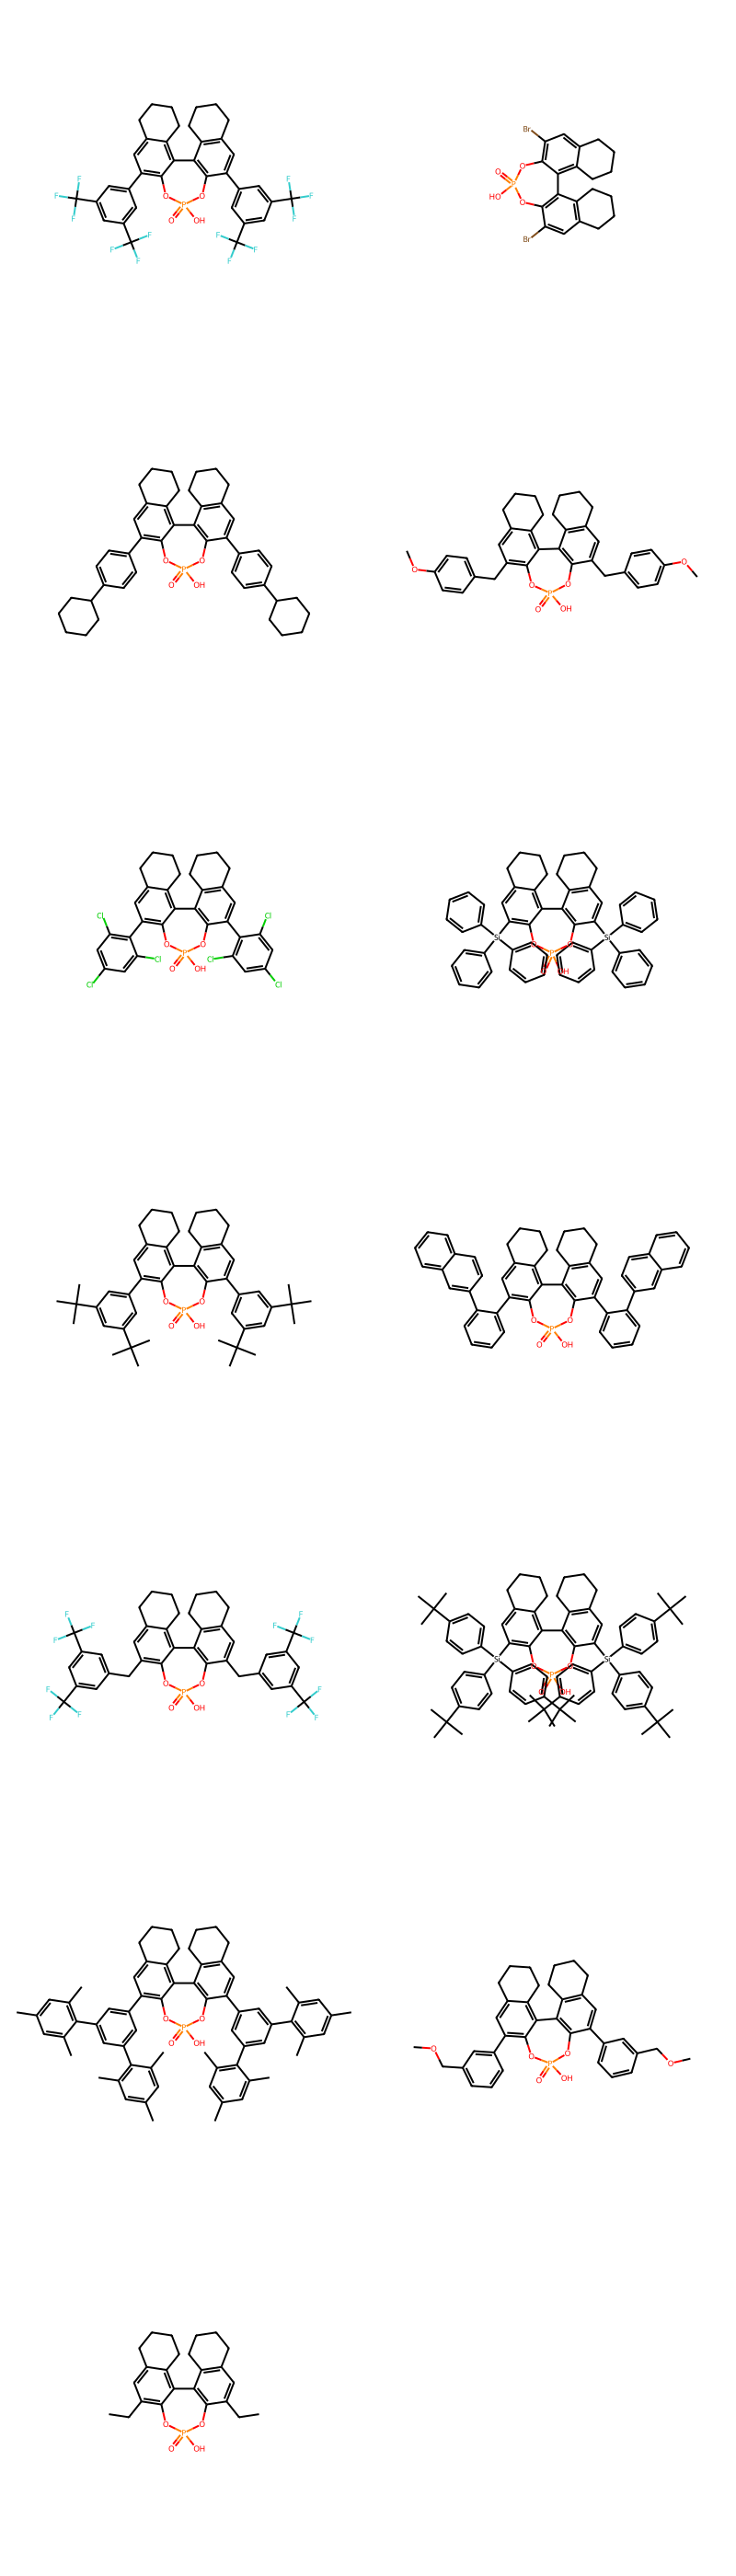

In [12]:
mols=[Chem.MolFromSmiles(smi) for smi in test_cat]
for index,i in enumerate(test_cat):
    print(index,i)
Chem.Draw.MolsToGridImage(mols,molsPerRow=2,subImgSize=(400,400))

In [ ]:
train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(cat_smiles):
    if tmp_smi in train_cat:
        train_index.append(tmp_idx)
    elif tmp_smi in test_cat:
        val_index.append(tmp_idx)
        
loss = 'mse'
batch_size = 32
spms_train,elec_train,y_train = react_spms[train_index],react_elec[train_index],labels[train_index]
spms_val,elec_val,y_val = react_spms[val_index],react_elec[val_index],labels[val_index]

y_train_std=(y_train-y_train.min())/(y_train.max()-y_train.min())
y_val_std=(y_val-y_train.min())/(y_train.max()-y_train.min())
                                                   
train_gen = Graph_DataLoader(spms_train,elec_train,y_train_std,batch_size=batch_size)
valid_gen = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size)
valid_gen_predict = Graph_DataLoader(spms_val,elec_val,y_val_std,batch_size=batch_size,predict=True)
opt = tf.keras.optimizers.Adam()


model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='sigmoid')
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt,loss=loss)
checkpoint = tf.train.Checkpoint(myAwesomeModel=model)
EPOCHS = 50
for epoch in range(EPOCHS):
    hist = model.fit(train_gen,validation_data=valid_gen)
    path = checkpoint.save('./data2/run_data/data2_sca_cat.ckpt')
    print("model saved to %s" % path)#6 1 128


11/11 [==============================] - 1s 76ms/step


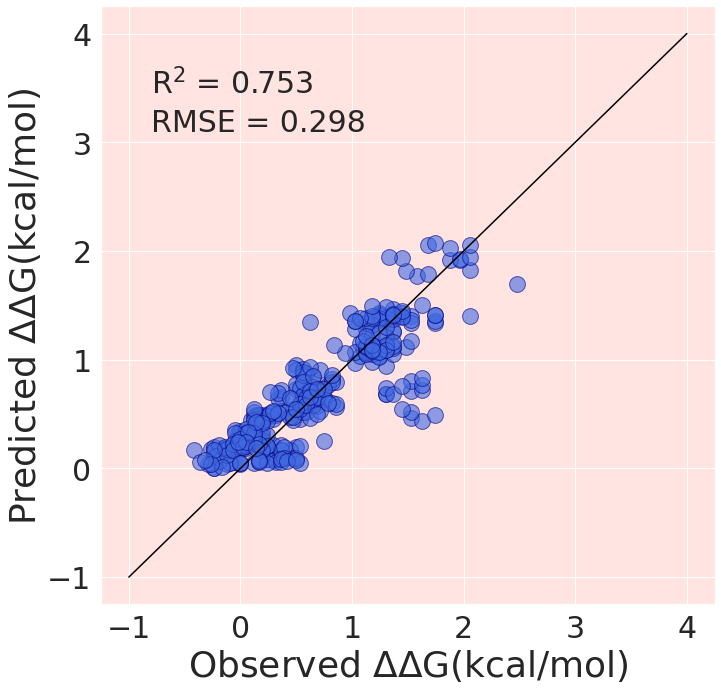

In [39]:
opt = tf.keras.optimizers.Adam()
new_model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='sigmoid')
new_model.compile(optimizer=opt,loss='mse')
checkpoint = tf.train.Checkpoint(myAwesomeModel=new_model) 
checkpoint.restore('./data2/run_data/data2_sca_cat.ckpt-50')
_ = new_model.fit(valid_gen,epochs=1)
 

y_pred = new_model.predict(valid_gen_predict)
y_pred=y_pred*(y_train.max()-y_train.min())+y_train.min()

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

In [11]:
np.save('./result/data1_SEMG_MIGNN_y_val_sca_cat.npy',y_val)
np.save('./result/data1_SEMG_MIGNN_y_pred_sca_cat.npy',y_pred)

### Transformations

In [16]:
cat_uts_train_smi = ['O=P1(O)OC2=C(Br)C=C3C(C=CC=C3)=C2C4=C(O1)C(Br)=CC5=CC=CC=C54',
                     'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C4=CC=C(C(C)(C)C)C=C4)C=C3C(C)C)C=C5C(C=CC=C5)=[C@]2[C@]6=C(O1)C(C7=C(C(C)C)C=C(C8=CC=C(C(C)(C)C)C=C8)C=C7C(C)C)=CC9=C6C=CC=C9',
                     'O=P1(O)OC2=C(C3=C(C4=CC(C=CC=C5)=C5C=C4)C=CC=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC=CC=C8C9=CC=C(C=CC=C%10)C%10=C9)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=C(C5=CC(C=CC=C6)=C6C=C5)C7=C3C=CC=C7)C=C8C(C=CC=C8)=[C@]2[C@]9=C(O1)C(C%10=C(C=CC=C%11)C%11=C(C%12=CC=C(C=CC=C%13)C%13=C%12)C%14=C%10C=CC=C%14)=CC%15=C9C=CC=C%15',
                     'O=P1(O)OC2=C(C3=C(F)C=C(OC)C=C3F)C=C4C(C=CC=C4)=[C@]2[C@]5=C(O1)C(C6=C(F)C=C(OC)C=C6F)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=C(OCC)C=CC(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=CC=C6OCC)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C(C3=CC(C)=C(OC(C)C)C(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=C(OC(C)C)C(C)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C4=C(C)C=C(C)C=C4C)=CC(C5=C(C)C=C(C)C=C5C)=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC(C9=C(C)C=C(C)C=C9C)=CC(C%10=C(C)C=C(C)C=C%10C)=C8)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C(C3=CC(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)=CC(C5=CC(C(F)(F)F)=CC(C(F)(F)F)=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC(C(F)(F)F)=CC(C(F)(F)F)=C9)=CC(C%10=CC(C(F)(F)F)=CC(C(F)(F)F)=C%10)=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC(C4=CC(C=CC=C5)=C5C=C4)=CC=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=CC(C9=CC=C(C=CC=C%10)C%10=C9)=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC=C(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)C=C3)C=C5C(C=CC=C5)=C2C6=C(O1)C(C7=CC=C(C8=CC(C(F)(F)F)=CC(C(F)(F)F)=C8)C=C7)=CC9=C6C=CC=C9',
                     'O=P1(O)OC2=C(C3=CC=C(C4=CC=C(C=CC=C5)C5=C4)C=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=C(C9=CC(C=CC=C%10)=C%10C=C9)C=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC=C(C4CCCCC4)C=C3)C=C5C(CCCC5)=C2C6=C(O1)C(C7=CC=C(C8CCCCC8)C=C7)=CC9=C6CCCC9',
                     'O=P1(O)OC2=C(C3=CC=C(S(F)(F)(F)(F)F)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(S(F)(F)(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(CC)C=C3C(CCCC3)=C2C4=C(O1)C(CC)=CC5=C4CCCC5',
                     'O=P1(O)OC2=C(CC3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C(CC8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(CC3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C(CC3=CC=C(OC)C=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC=C(OC)C=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C([Si](C3=CC=C(C(C)(C)C)C=C3)(C4=CC=C(C(C)(C)C)C=C4)C5=CC=C(C(C)(C)C)C=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=C(C(C)(C)C)C=C8)(C9=CC=C(C(C)(C)C)C=C9)C%10=CC=C(C(C)(C)C)C=C%10)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C(CCCC4)=[C@]2[C@]5=C(O1)C(C6=C(Cl)C=C(Cl)C=C6Cl)=CC7=C5CCCC7'
                    ]
cat_uts_test_smi = ['O=P1(O)OC2=C(Br)C=C3C(CCCC3)=C2C4=C(O1)C(Br)=CC5=C4CCCC5',
                    'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C(C)C)C=C3C(C)C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C(C)C)C=C(C(C)C)C=C6C(C)C)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=C(C)C=C(C)C=C3C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C)C=C(C)C=C6C)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=C(C4CCCCC4)C=C(C5CCCCC5)C=C3C6CCCCC6)C=C7C(C=CC=C7)=C2C8=C(O1)[C@@]([C@@]9=C(C%10CCCCC%10)C=C(C%11CCCCC%11)C=C9C%12CCCCC%12)=CC%13=C8C=CC=C%13',
                    'O=P1(O)OC2=C(C3=C(C=CC4=CC=CC(C=C5)=C46)C6=C5C=C3)C=C7C(C=CC=C7)=C2C8=C(O1)C(C9=CC=C(C=C%10)C%11=C9C=CC%12=CC=CC%10=C%11%12)=CC%13=C8C=CC=C%13',
                    'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)[C@@]([C@@]8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=C(OC)C=CC=C3OC)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(OC)C=CC=C6OC)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5CCCC7',
                    'O=P1(O)OC2=C(C3=CC(C4=CC=C(OC)C=C4)=CC(C5=CC=C(OC)C=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC=C(OC)C=C9)=CC(C%10=CC=C(OC)C=C%10)=C8)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5CCCC7',
                    'O=P1(O)OC2=C(C3=CC=C(C(C)(C)C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C(C)(C)C)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=C(C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=C(OC)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(OC)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(CC3=CC=C(C(F)(F)F)C=C3C(F)(F)F)C=C4C(C=CC=C4)=C2C5=C(O1)C(CC6=C(C(F)(F)F)C=C(C(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C)C4=CC=CC=C4)C=C5C(C=CC=C5)=C2C6=C(O1)C([Si](C7=CC=CC=C7)(C8=CC=CC=C8)C)=CC9=C6C=CC=C9',
                    'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=C(OC(F)(F)F)C=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6OC(F)(F)F)=CC7=C5C=CC=C7'
                   ]
imine_test_smi = 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl'
thiol_test_smi = 'SC1=CC=CC=C1C'

train_idx = []
trans_test_idx = []
for tmp_idx in range(len(cat_smiles)):
    tmp_cat_smi = cat_smiles[tmp_idx]
    tmp_imine_smi = imine_smiles[tmp_idx]
    tmp_thiol_smi = thiol_smiles[tmp_idx]
    if tmp_cat_smi in cat_uts_train_smi and tmp_imine_smi != imine_test_smi and tmp_thiol_smi != thiol_test_smi:
        train_idx.append(tmp_idx)
    elif (tmp_cat_smi in cat_uts_train_smi and tmp_imine_smi == imine_test_smi) or (tmp_cat_smi in cat_uts_train_smi and tmp_thiol_smi == thiol_test_smi):
        trans_test_idx.append(tmp_idx)

batch_size = 128
spms_train,elec_train,y_train = react_spms[train_idx],react_elec[train_idx],labels[train_idx]
trans_spms_val,trans_elec_val,trans_y_val = react_spms[trans_test_idx],react_elec[trans_test_idx],labels[trans_test_idx]

train_gen = Graph_DataLoader(spms_train,elec_train,y_train,batch_size=batch_size)
trans_val_gen = Graph_DataLoader(trans_spms_val,trans_elec_val,trans_y_val,batch_size=batch_size)

train_gen_pred = Graph_DataLoader(spms_train,elec_train,y_train,batch_size=batch_size,predict=True)
trans_val_gen_pred = Graph_DataLoader(trans_spms_val,trans_elec_val,trans_y_val,batch_size=batch_size,predict=True)

In [ ]:
loss = 'mse'
model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='dense')
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt,loss=loss)
checkpoint = tf.train.Checkpoint(myAwesomeModel=model)
EPOCHS = 50
for epoch in range(EPOCHS):
    hist = model.fit(train_gen,validation_data=trans_val_gen)
    path = checkpoint.save('./data2/run_data/data2_trans.ckpt')
    print("model saved to %s" % path)

2/2 [==============================] - 1s 237ms/step


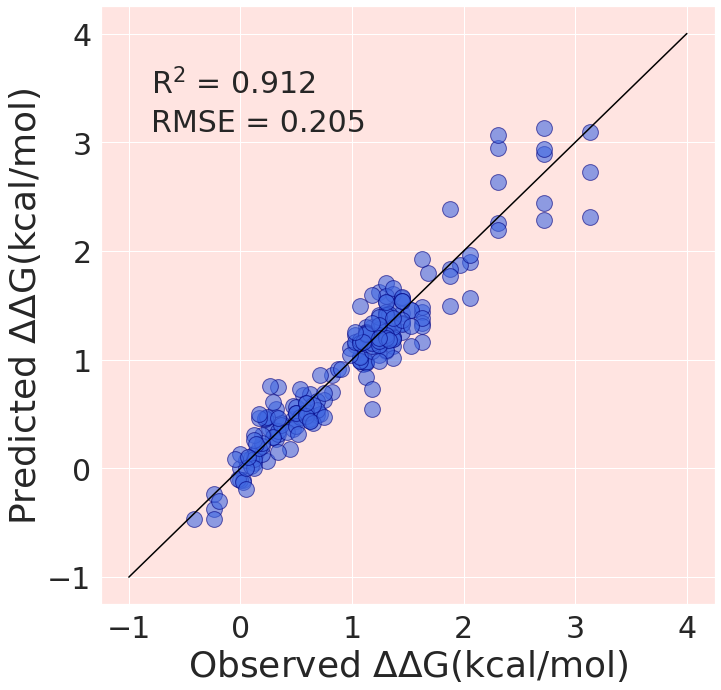

In [25]:
y_val=trans_y_val
opt = tf.keras.optimizers.Adam()
new_model = MIGNN_model2(184, 33, 19,linear_depth=2,atom_attention=1,inter_attention=1,end_attention=1,hidden_size=512,final_act='none')
new_model.compile(optimizer=opt,loss='mse')
_ = new_model.fit(trans_val_gen,epochs=1)
checkpoint = tf.train.Checkpoint(myAwesomeModel=new_model) 
checkpoint.restore('./data2/run_data/data2_trans.ckpt-50') 
y_pred = new_model.predict(sub_val_gen_pred)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

In [16]:
np.save('./result/data2_SEMG_MIGNN_y_val_trans.npy',y_val)
np.save('./result/data2_SEMG_MIGNN_y_pred_trans.npy',y_pred)